In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import os
import cv2 
from PIL import Image

2023-07-23 17:03:56.068847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 17:03:56.351339: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-23 17:03:56.492784: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-23 17:04:00.293941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
images = []
path = "image_data"
# iterate over each file in the directory
for filename in os.listdir(path):
    # check if the file is an image
    if filename.endswith('.jpg'):
        # create a PIL image object
        image = Image.open(os.path.join(path, filename))
        
        # convert image into numpy array
        data = np.array(image)
        data = data / 255
        
        # add image pixel data to the list
        images.append(data)

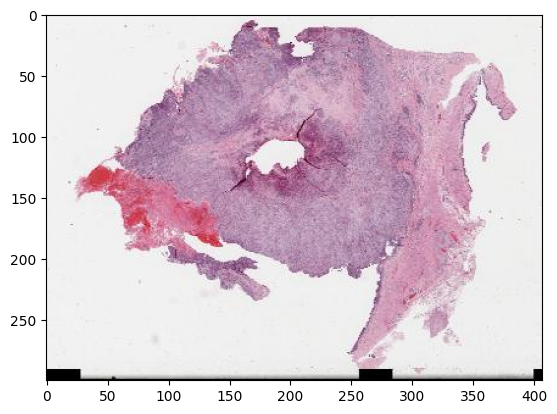

In [3]:
plt.imshow(images[1])

In [4]:
np.shape(images)

(342, 300, 407, 3)

In [5]:
df = pd.read_csv('clinical.tsv', sep='\t')
df.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,a1ad1a96-2b6e-4c86-9d71-e176b902e9d4,TCGA-B8-5545,TCGA-KIRC,42,'--,'--,'--,'--,-15376,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
1,a1ad1a96-2b6e-4c86-9d71-e176b902e9d4,TCGA-B8-5545,TCGA-KIRC,42,'--,'--,'--,'--,-15376,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
2,63dd7202-2ba3-41bb-8d05-8a7b4f34c7d1,TCGA-BP-4784,TCGA-KIRC,67,'--,'--,'--,'--,-24603,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,63dd7202-2ba3-41bb-8d05-8a7b4f34c7d1,TCGA-BP-4784,TCGA-KIRC,67,'--,'--,'--,'--,-24603,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
4,04beccb3-f513-4d60-b57f-a4382e4eeda3,TCGA-B8-A8YJ,TCGA-KIRC,60,'--,'--,'--,'--,-21994,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"


In [6]:
image_files = [os.path.splitext(f)[0] for f in os.listdir(path) if f.endswith('.jpg')]
len(image_files)

342

In [7]:
texts = []
for j in range(len(image_files)):
    for i in range(len(df['case_submitter_id'])):
        if image_files[j] == df['case_submitter_id'][i]:
            tmp = df['ajcc_pathologic_m'][i] + ' ' + df['ajcc_pathologic_n'][i] + ' ' + df['ajcc_pathologic_stage'][i].replace(" ", "") + ' ' + df['ajcc_pathologic_t'][i] + ' ' + df['icd_10_code'][i] + ', ' + df['primary_diagnosis'][i].replace(",", "") + ', ' + df['treatment_type'][i].replace(",", "")
            texts.append(tmp)
            break

In [8]:
texts[100]

'M0 N0 StageI T1b C64.9, Clear cell adenocarcinoma NOS, Radiation Therapy NOS'

In [9]:
len(texts)

342